In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,ID,Sex,Bachelor,Age,Graduated,Career,Work Experience,Family Expenses,Family Size,Variable,Segmentation,Description
0,1462220581,Male,No,41,Yes,Fashion Designer,2,Low,3,Dog_6,Akshat,The specimen is reliable and experienced.
1,1462220232,Female,Yes,38,Yes,HR,0,Average,2,Dog_6,Akshat,The specimen is reliable and experienced.
2,1462226544,Male,Yes,41,Yes,Fashion Designer,0,High,5,Dog_6,Bhavesh,The specimen is reliable and experienced.
3,1462224171,Male,No,21,No,Doctor,0,Low,4,Dog_6,Darsh,The specimen is responsible and hardworking.
4,1462226427,Female,No,37,Yes,Fashion Designer,0,Low,1,Dog_2,Bhavesh,The specimen is reliable and experienced.


In [ ]:
print("Rows, Columns:", df.shape)
df.info()

Rows, Columns: (5647, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               5647 non-null   int64 
 1   Sex              5615 non-null   object
 2   Bachelor         5523 non-null   object
 3   Age              5625 non-null   object
 4   Graduated        5578 non-null   object
 5   Career           5534 non-null   object
 6   Work Experience  5074 non-null   object
 7   Family Expenses  5616 non-null   object
 8   Family  Size     5398 non-null   object
 9   Variable         5595 non-null   object
 10  Segmentation     5647 non-null   object
 11  Description      5647 non-null   object
dtypes: int64(1), object(11)
memory usage: 529.5+ KB


In [ ]:
df.isnull().sum()

,0
ID,0
Sex,32
Bachelor,124
Age,22
Graduated,69
Career,113
Work Experience,573
Family Expenses,31
Family Size,249
Variable,52


Text(0, 0.5, 'Number Of Customers')

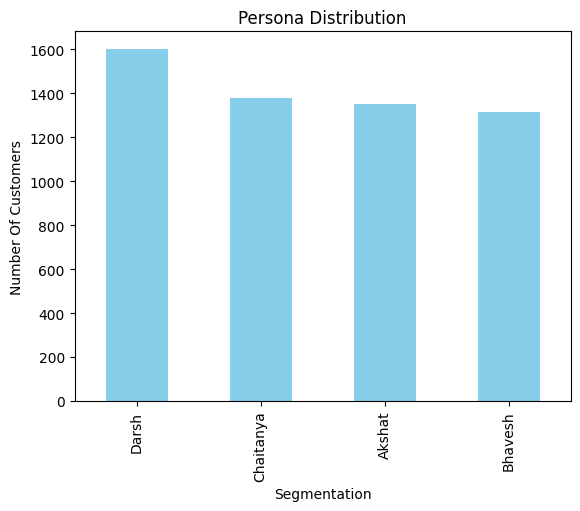

In [ ]:
df['Segmentation'].value_counts().plot(kind = 'bar' , color = 'skyblue')
plt.title("Persona Distribution")
plt.ylabel("Number Of Customers")

In [ ]:
print("Sex:" , df['Sex'].unique())
print("Graduated:",df['Graduated'].unique())
print("Career:",df['Career'].unique())
print("Family Expenses:",df['Family Expenses'].unique())

Sex: ['Male' 'Female' nan]
Graduated: ['Yes' 'No' nan]
Career: ['Fashion Designer' 'HR' 'Doctor' 'Lawyer' nan 'Scientist' 'Singer'
 'Content Creation' 'Housewife' '1234' '_' 'Doktor']
Family Expenses: ['Low' 'Average' 'High' 'NAN' nan 'Avege' 'L0w']


Text(0.5, 1.0, 'Age Distribution')

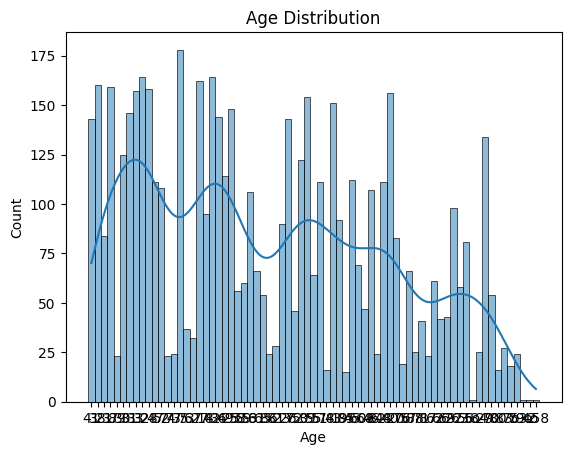

In [ ]:
sns.histplot(df['Age'], bins=20, kde=True)
plt.title("Age Distribution")


Text(0.5, 1.0, 'Work Experience by Persona')

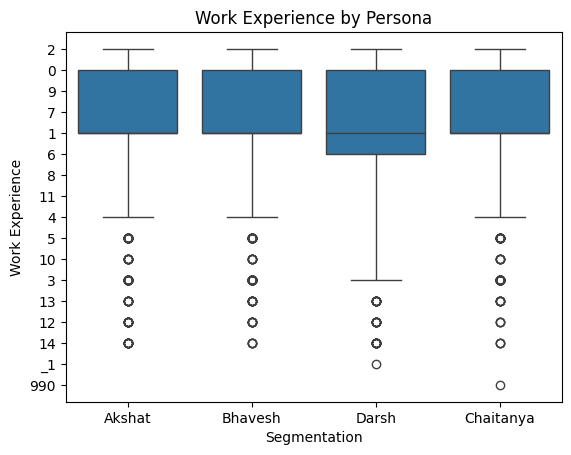

In [ ]:
sns.boxplot(x= 'Segmentation', y = 'Work Experience', data=df)
plt.title("Work Experience by Persona")

Text(0.5, 1.0, 'Family Expenses by Persona')

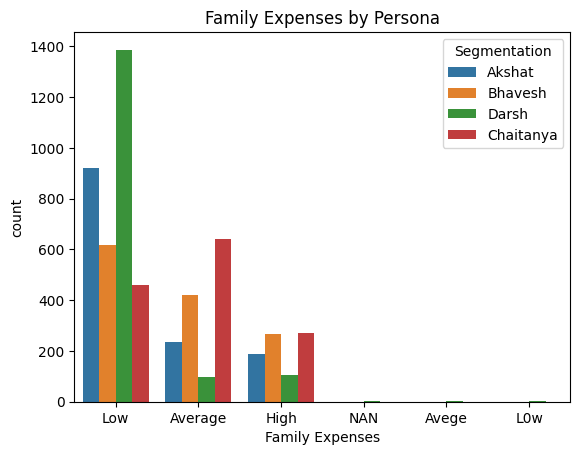

In [ ]:
sns.countplot(x='Family Expenses', hue='Segmentation', data=df)
plt.title("Family Expenses by Persona")

Text(0.5, 1.0, 'Family Sizes by Persona')

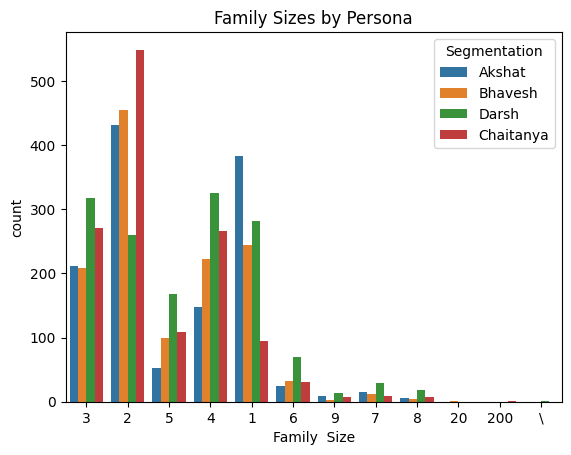

In [ ]:
sns.countplot(x='Family  Size', hue='Segmentation', data=df)
plt.title("Family Sizes by Persona")

Text(0.5, 1.0, 'Bachelors by Persona')

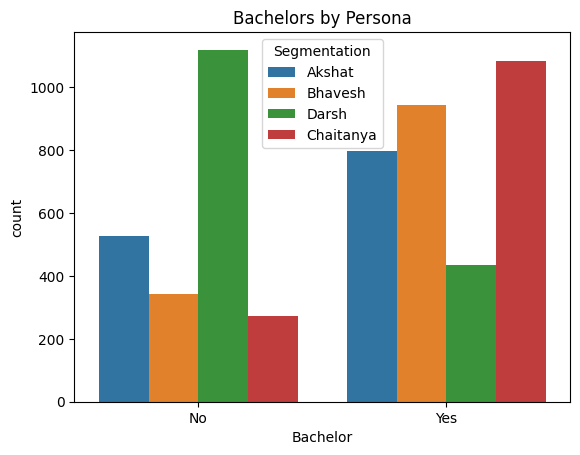

In [ ]:
sns.countplot(x='Bachelor', hue='Segmentation', data=df)
plt.title("Bachelors by Persona")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Segmentation'] = le.fit_transform(df['Segmentation'])
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("Persona Label Mapping:", label_map)

Persona Label Mapping: {'Akshat': np.int64(0), 'Bhavesh': np.int64(1), 'Chaitanya': np.int64(2), 'Darsh': np.int64(3)}


In [ ]:
expense_map = {'Low' : 0, 'Average' : 1, 'High' : 2}
df['Family Expenses'] = df['Family Expenses'].map(expense_map)

In [ ]:
categorical_cols = ['Sex', 'Graduated', 'Career', 'Bachelor', 'Variable']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
df.isnull().sum()

,0
ID,0
Age,22
Work Experience,573
Family Expenses,5647
Family Size,249
Segmentation,0
Description,0
Sex_Male,0
Graduated_Yes,0
Career_Content Creation,0


In [ ]:
df['Work Experience'] = pd.to_numeric(df['Work Experience'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Family  Size'] = pd.to_numeric(df['Family  Size'], errors='coerce')
df['Family Expenses'] = pd.to_numeric(df['Family Expenses'], errors='coerce')

df['Work Experience'].fillna(df['Work Experience'].median(), inplace=True)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Family Expenses'].fillna(df['Family Expenses'].median(), inplace=True)
df['Family  Size'].fillna(df['Family  Size'].median(), inplace=True)

/tmp/ipython-input-29-3677434747.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Work Experience'].fillna(df['Work Experience'].median(), inplace=True)
/tmp/ipython-input-29-3677434747.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
print("Final shape:", df.shape)
print("All columns", df.columns.tolist())

Final shape: (5647, 26)
All columns ['ID', 'Age', 'Work Experience', 'Family Expenses', 'Family  Size', 'Segmentation', 'Description', 'Sex_Male', 'Graduated_Yes', 'Career_Content Creation', 'Career_Doctor', 'Career_Doktor', 'Career_Fashion Designer', 'Career_HR', 'Career_Housewife', 'Career_Lawyer', 'Career_Scientist', 'Career_Singer', 'Career__', 'Bachelor_Yes', 'Variable_Dog_2', 'Variable_Dog_3', 'Variable_Dog_4', 'Variable_Dog_5', 'Variable_Dog_6', 'Variable_Dog_7']


In [ ]:
x = df.drop('Segmentation', axis=1)
y = df['Segmentation']

In [ ]:
x = df.drop(['Segmentation','ID', 'Description'], axis = 1)
y = df['Segmentation']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

Accuracy: 0.47345132743362833

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.39      0.37       240
           1       0.39      0.30      0.34       283
           2       0.50      0.52      0.51       284
           3       0.60      0.64      0.62       323

    accuracy                           0.47      1130
   macro avg       0.46      0.46      0.46      1130
weighted avg       0.47      0.47      0.47      1130


Confusion Matrix: 
 [[ 93  48  44  55]
 [ 69  85  89  40]
 [ 32  62 149  41]
 [ 75  24  16 208]]


In [ ]:
import joblib
joblib.dump(model, 'personality_predictor.pkl')

['personality_predictor.pkl']

In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.9 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import joblib
import pandas as pd

model = joblib.load('personality_predictor.pkl')
st.title("Global Persona Predictor")

sex = st.selectbox("Sex", ["Male", "Female"])
bachelor = st.selectbox("Marital Status", ["Yes", "No"])
age = st.slider("Age", 18,80,25)
graduated = st.selectbox("Graduated",["Yes", "No"])
career = st.selectbox("Career", ['Doctor', 'Lawyer', 'Scientist', ...])

work_ex = st.slider("Work Experience", 0, 40, 3)
fam_exp = st.selectbox("Family Expenses", ["Low", "Average", "High"])
fam_size = st.slider("Family Size", 1, 10, 3)
variable = st.selectbox("Other Variable", ['Dog_1', 'Dog_2', ...])

input_data = pd.DataFrame({
    'Sex': [sex],
    'Bachelor': [bachelor],
    'Age': [age],
    'Graduated': [graduated],
    'Career': [career],
    'Work Experience': [work_ex],
    'Family Expenses': [fam_exp],
    'Family Size': [fam_size],
    'Variable': [variable]
})

if st.button("Predict Persona"):
  prediction = model.predict(input_data)
  st.success(f"Predicted Persona: **{prediction[0]}**")

2025-07-25 16:24:05.595 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.596 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.597 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.600 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.601 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.602 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-25 16:24:05.603 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar